## Fuentes

### Fuente Wine Reviews -> **Fuente definitiva**
wine reviews with variety, location, winery, price, and description
url = 'https://www.kaggle.com/datasets/manyregression/updated-wine-enthusiast-review/data'

## Documentación complementaria

target -> https://www.wineenthusiast.com/wine-ratings/
denominaciones de origen-> https://es.wikipedia.org/wiki/Anexo:Vinos_de_Espa%C3%B1a
estilos vino -> consulta de variedades a chatgpt

### Librerías importadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
import re
import numpy as np
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
import matplotlib as mpl
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import GridSearchCV

### Fuente Wine Reviews -> **Fuente definitiva**
wine reviews with variety, location, winery, price, and description

In [27]:
url = '../data/raw//winemag-data-2017-2020.csv'
wine_rev2 = pd.read_csv(url)
wine_rev2.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley


In [28]:
wine_rev2.describe()

,points,price
count,81115.000000,76468.000000
mean,89.383135,39.181618
std,2.918882,48.177663
min,80.000000,4.000000
25%,87.000000,19.000000
50%,89.000000,29.000000
75%,91.000000,47.000000
max,100.000000,3400.000000


In [29]:
wine_rev2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81115 entries, 0 to 81114
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                81110 non-null  object 
 1   description            81115 non-null  object 
 2   designation            59796 non-null  object 
 3   points                 81115 non-null  int64  
 4   price                  76468 non-null  float64
 5   province               81110 non-null  object 
 6   region_1               68202 non-null  object 
 7   region_2               31221 non-null  object 
 8   taster_name            80965 non-null  object 
 9   taster_photo           80965 non-null  object 
 10  taster_twitter_handle  80039 non-null  object 
 11  title                  81115 non-null  object 
 12  variety                81115 non-null  object 
 13  vintage                81115 non-null  object 
 14  winery                 81115 non-null  object 
dtypes:

In [30]:
wine_rev2["vintage"] = np.where(wine_rev2["vintage"] == "NV", 0, wine_rev2["vintage"])
wine_rev2["vintage"] = wine_rev2["vintage"].astype(int)

In [31]:
wine_rev2['country_clas'] = pd.factorize(wine_rev2['country'])[0]
wine_rev2['province_clas'] = pd.factorize(wine_rev2['province'])[0]
wine_rev2['designation_clas'] = pd.factorize(wine_rev2['designation'])[0]
wine_rev2['winery_clas'] = pd.factorize(wine_rev2['winery'])[0]
wine_rev2['variety_clas'] = pd.factorize(wine_rev2['variety'])[0]
wine_rev2['region_1_clas'] = pd.factorize(wine_rev2['region_1'])[0]
wine_rev2['region_2_clas'] = pd.factorize(wine_rev2['region_2'])[0]
wine_rev2['taster_name_clas'] = pd.factorize(wine_rev2['taster_name'])[0]

In [35]:
wine_rev2.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_photo',
       'taster_twitter_handle', 'title', 'variety', 'vintage', 'winery',
       'country_clas', 'province_clas', 'designation_clas', 'winery_clas',
       'variety_clas', 'region_1_clas', 'region_2_clas', 'taster_name_clas'],
      dtype='object')

In [37]:
wine_rev2 = wine_rev2[['title', 'vintage', 'winery', 'variety', 'country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2',  
       'country_clas', 'province_clas', 'designation_clas', 'winery_clas',
       'variety_clas', 'region_1_clas', 'region_2_clas', 'taster_name_clas', 'taster_name', 'taster_photo',
       'taster_twitter_handle']]

In [38]:
wine_rev2.describe(include="all")

,title,vintage,winery,variety,country,description,designation,points,price,province,...,province_clas,designation_clas,winery_clas,variety_clas,region_1_clas,region_2_clas,taster_name_clas,taster_name,taster_photo,taster_twitter_handle
count,81115,81115.000000,81115,81115,81110,81115,59796,81115.000000,76468.000000,81110,...,81115.000000,81115.000000,81115.000000,81115.000000,81115.000000,81115.000000,81115.000000,80965,80965,80039
unique,80462,NaN,12833,708,43,81090,29511,NaN,NaN,366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,16
top,Boizel NV Ultime Extra Brut (Champagne),NaN,Maryhill,Pinot Noir,US,92–94. Barrel Sample. A dense wine with ripe t...,Reserve,NaN,NaN,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger
freq,3,NaN,148,9044,32174,2,931,NaN,NaN,21513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17436,17436,17436
mean,NaN,1950.821057,NaN,NaN,NaN,NaN,NaN,89.383135,39.181618,NaN,...,28.586131,7621.378438,4203.191370,40.870899,138.426185,1.216890,5.720607,NaN,NaN,NaN
std,NaN,355.009212,NaN,NaN,NaN,NaN,NaN,2.918882,48.177663,NaN,...,40.042202,8825.818575,3395.728606,69.516699,181.738814,3.823889,4.853703,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,...,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,87.000000,19.000000,NaN,...,1.000000,-1.000000,1310.000000,11.000000,8.000000,-1.000000,1.000000,NaN,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,89.000000,29.000000,NaN,...,13.000000,3643.000000,3268.000000,20.000000,65.000000,-1.000000,5.000000,NaN,NaN,NaN
75%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,91.000000,47.000000,NaN,...,42.000000,13683.500000,6830.000000,48.000000,196.000000,3.000000,9.000000,NaN,NaN,NaN


In [43]:
duplicated = wine_rev2[wine_rev2["title"].duplicated(keep=False)].sort_values(by="title")

In [ ]:
duplicated

In [44]:
wine_rev2 = wine_rev2.sort_values(by="points", ascending=False).drop_duplicates(subset="title", keep="first").reset_index(drop=True)

In [45]:
wine_rev2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80462 entries, 0 to 80461
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  80462 non-null  object 
 1   vintage                80462 non-null  int64  
 2   winery                 80462 non-null  object 
 3   variety                80462 non-null  object 
 4   country                80457 non-null  object 
 5   description            80462 non-null  object 
 6   designation            59349 non-null  object 
 7   points                 80462 non-null  int64  
 8   price                  75916 non-null  float64
 9   province               80457 non-null  object 
 10  region_1               67595 non-null  object 
 11  region_2               31119 non-null  object 
 12  country_clas           80462 non-null  int64  
 13  province_clas          80462 non-null  int64  
 14  designation_clas       80462 non-null  int64  
 15  wi

<Axes: >

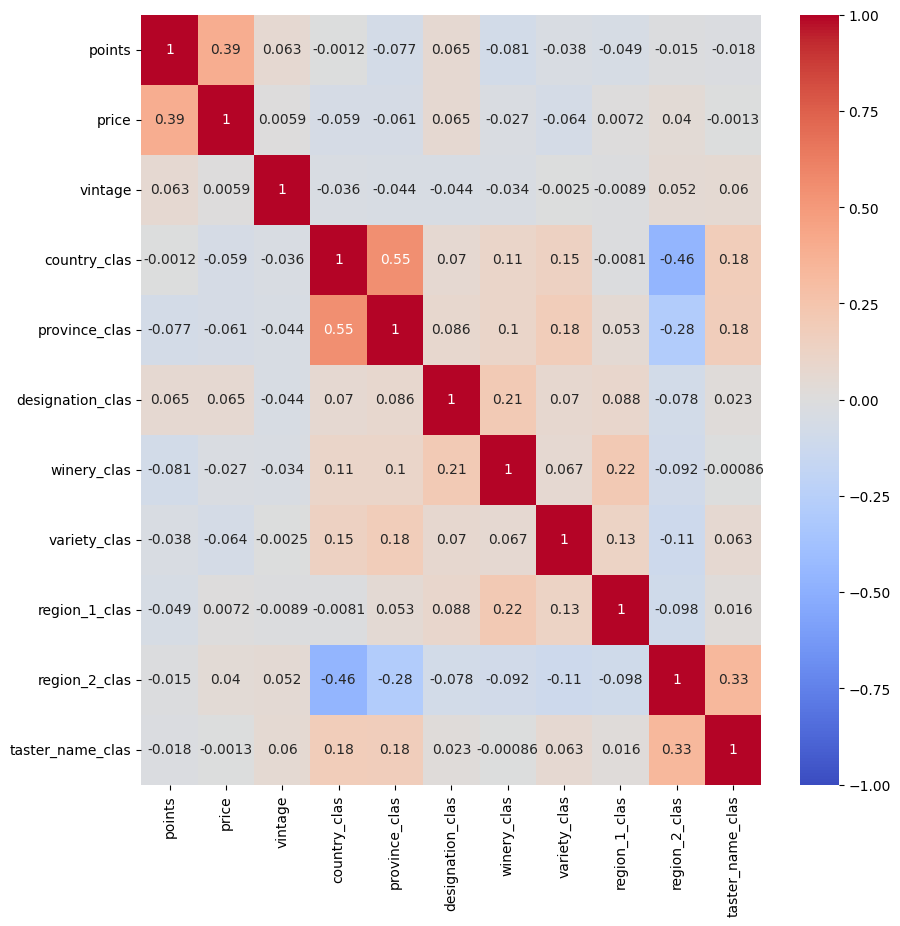

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_rev2.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

## DS definitivo. Filtro del dataset por los vinos españoles únicamente

taster_name = Michael Schachner
https://www.wineenthusiast.com/contributor/michael-schachner/?srsltid=AfmBOopteGo7yRLmJCN8_wn5HG74R4Sy78ZV_dJ-J0SvYBHBBFtOS7j4

In [28]:
esp = wine_rev2[wine_rev2["country"]== "Spain"]

In [ ]:
esp.head(5)

In [30]:
esp = esp.dropna(subset=["price"])
esp = esp.dropna(axis=1,how="all")
esp = esp.drop(columns=(["country","country_clas", "taster_name", "taster_photo", "taster_twitter_handle", "region_2_clas", "taster_name_clas"]))

In [43]:
esp.head(5)

,description,designation,points,price,province,region_1,title,variety,vintage,winery,province_clas,designation_clas,winery_clas,variety_clas,region_1_clas
120,"A mix of earthy berry, cassis and leather arom...",Reserva Old Vines Unfiltered,91,90.0,Northern Spain,Rioja,Remírez de Ganuza 2008 Reserva Old Vines Unfil...,Tempranillo Blend,2008,Remírez de Ganuza,20,73,117,42,57
121,Richly oaked aromas of maple and mocha accent ...,Viña Coqueta,91,78.0,Northern Spain,Rioja,Remírez de Ganuza 2008 Viña Coqueta (Rioja),Tempranillo Blend,2008,Remírez de Ganuza,20,74,117,42,57
141,"Stone-fruit, orange peel and Ribeira Sacra's t...",Peza do Rei,89,21.0,Galicia,Ribeira Sacra,Adega Cachín 2015 Peza do Rei White (Ribeira S...,White Blend,2015,Adega Cachín,40,89,136,49,67
180,"Ripe raisiny aromas are soft, maybe to a fault...",NaN,88,20.0,Central Spain,Vino de la Tierra de Castilla,Ardales 2011 Tempranillo (Vino de la Tierra de...,Tempranillo,2011,Ardales,50,-1,172,57,79
185,"Slightly rustic earthy aromas of animal, black...",Barrica,88,16.0,Levante,Jumilla,Monterebro 2014 Barrica Monastrell-Syrah (Jumi...,Monastrell-Syrah,2014,Monterebro,52,119,177,59,81


In [32]:
esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3375 entries, 120 to 81063
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   description       3375 non-null   object 
 1   designation       2801 non-null   object 
 2   points            3375 non-null   int64  
 3   price             3375 non-null   float64
 4   province          3375 non-null   object 
 5   region_1          3375 non-null   object 
 6   title             3375 non-null   object 
 7   variety           3375 non-null   object 
 8   vintage           3375 non-null   int64  
 9   winery            3375 non-null   object 
 10  province_clas     3375 non-null   int64  
 11  designation_clas  3375 non-null   int64  
 12  winery_clas       3375 non-null   int64  
 13  variety_clas      3375 non-null   int64  
 14  region_1_clas     3375 non-null   int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 421.9+ KB


In [39]:
esp.describe()

,points,price,vintage,province_clas,designation_clas,winery_clas,variety_clas,region_1_clas
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000
mean,87.469333,29.303704,1880.229630,35.651556,8933.334222,4858.744296,83.169185,162.386370
std,3.157803,37.249474,502.595702,22.688480,9386.888049,3415.466599,93.019200,143.680005
min,80.000000,4.000000,0.000000,20.000000,-1.000000,49.000000,1.000000,29.000000
25%,85.000000,15.000000,2013.000000,20.000000,173.000000,2021.000000,42.000000,57.000000
50%,87.000000,20.000000,2015.000000,20.000000,5714.000000,4265.000000,57.000000,147.000000
75%,90.000000,30.000000,2016.000000,52.000000,16781.000000,7178.000000,86.000000,177.000000
max,97.000000,770.000000,2019.000000,211.000000,29494.000000,12817.000000,700.000000,1008.000000


<Axes: >

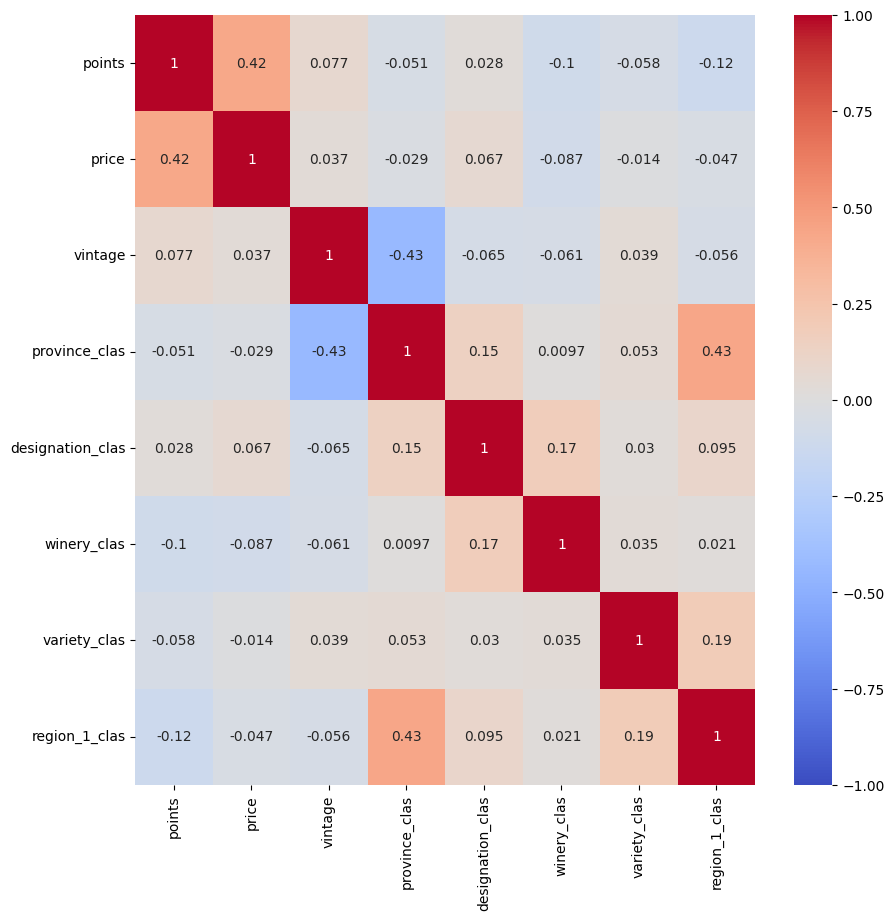

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(esp.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

(0.0, 200.0)

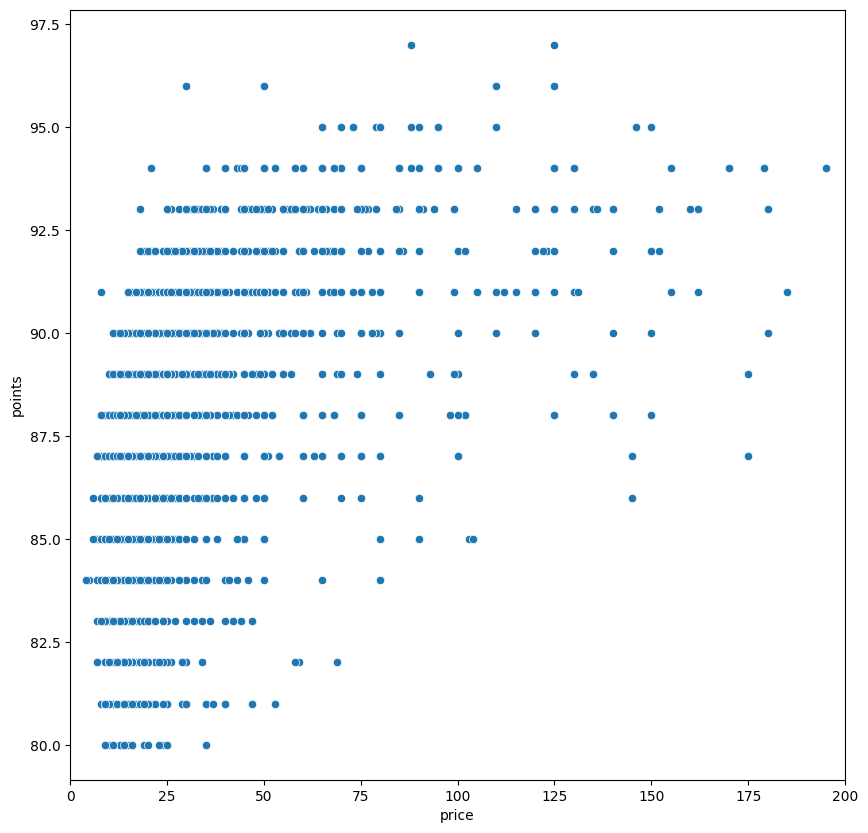

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(esp, y="points", x="price")
plt.xlim(0, 200)


## Test

In [37]:
X = esp[["price","vintage", "winery_clas", "variety_clas", "designation_clas"]]
y = esp['points']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=55)
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
rfc =xgboost.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,objective='reg:squarederror',random_state=42)
rfc.fit(X_train_sc,y_train)
y_pred_train = rfc.predict(X_train_sc)
y_pred_test = rfc.predict(X_test_sc)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
print("train:", mae_train)
print("test:", mae_test)
print(rfc.feature_importances_)
print(*X_train.columns)


train: 1.189550323486328
test: 1.727107442220052
[0.5718021  0.12034081 0.095594   0.11776333 0.09449986]
price vintage winery_clas variety_clas designation_clas
